9.2 Preparation

In [1]:
import numpy as np 
x = np.arange(10)
print("x = ", x)
# all but the first element: 
print("x[1:] = ", x[1:])
# all but the last element: 
print("x[:-1] = ", x[:-1]) 
# the first 4 elements:
print("x[:4] = ", x[:4])
# elements from index 2 to 6: 
print("x[2:7] = ", x[2:7])
# elements in reverse order: 
print("x[::-1] = ", x[::-1])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
x =  [0 1 2 3 4 5 6 7 8 9]
x[1:] =  [1 2 3 4 5 6 7 8 9]
x[:-1] =  [0 1 2 3 4 5 6 7 8]
x[:4] =  [0 1 2 3]
x[2:7] =  [2 3 4 5 6]
x[::-1] =  [9 8 7 6 5 4 3 2 1 0]


In [2]:
#9.2
x = np.arange(5)
print("x = ", x) 
print("midpoints: ", (x[1:]+x[:-1])/2)

x =  [0 1 2 3 4]
midpoints:  [0.5 1.5 2.5 3.5]


In [3]:
# 9.3 
x = np.array([1,2,1,4,5,1,7,3]) 
print("x = ", x)
mask = x > 2
print("mask = ", mask) 
print("x[mask] = ", x[mask])

x =  [1 2 1 4 5 1 7 3]
mask =  [False False False  True  True False  True  True]
x[mask] =  [4 5 7 3]


In [4]:
# 9.4
x = np.array([1,2,1,4,5,1,7,3])
mask = x>3 
np.sum(mask)

3

In [5]:
# 9.5
a = 7**5 
c = 0
M = 2**31 - 1.

def parkmiller(i):
    In1 = (a * i + c) % M
    # your code here
    return In1 # updated value

i = 1
for n in range(10000):
    i = parkmiller(i)
    #print(i)
# 1043618065
print(i)

1043618065.0


In [6]:
# 9.6 
i = 1043618068
l=1
xarr=[]
for n in range(5):
    i = parkmiller(i)
    xn = l * i/M
    xarr.append(xn)
print(xarr)

[0.7403659763468271, 0.3309644611230886, 0.5196980957499231, 0.5658952689570819, 0.001785361674514302]


In [7]:
# 9.7
xarr = np.random.uniform(0,1,5)
print(np.around(xarr,2))

[0.07 0.29 0.46 0.19 0.33]


# section 9.4
Probability Density Functions and Histograms

In [8]:
# 9.8 
# probability density function
def pdf(x):
    mask =  (0<=x) & (x<=1) 
    p = np.zeros(len(x))
    p[mask] = 1
    return p

xf = np.linspace(-1.5,1.5,100) 

mask =  (0<=xf) & (xf<=1) 
p = np.zeros(len(xf))
p[mask] = 1
yf = pdf(xf)


In [9]:
%matplotlib inline
from matplotlib import pylab as plt
plt.plot(xf,yf,'--b')

In [10]:
# 9.9
NTOT = 1000
NBIN = 12
XMIN = -1.5
XMAX = 1.5
# throw NTOT
xarr = np.random.uniform(size=NTOT)
#create a histogram from the random values in xarr: 
# hx: the histogram counts (length NBIN)
# edges: the bin edges (length NBIN+1)
hx,edges = np.histogram(xarr,bins=NBIN,range=(XMIN,XMAX))
# calculate the center of each bin, for plotting:
cbins = (edges[1:]+edges[:-1])/2
# calculate the error in each bin as the square root of the count 
err = np.sqrt(hx)
print(len(edges))
# plot the histogram, including errorbars, using the errorbar function:
plt.errorbar(cbins,hx,yerr=err,fmt="ko",label="Histogram") 
# add the labels
plt.xlabel("x")
plt.ylabel("Entries")

13


Text(42.597222222222214, 0.5, 'Entries')

Modify the code snippet from the previous example to create and draw a histogram from 1000 random values thrown in the range [0, 1] using your Park and Miller algorithm.

In [11]:
#9.10 
NTOT = 1000
NBIN = 12
XMIN = -1.5
XMAX = 1.5

i = 1043618068
l=1
xarr=[]
for n in range(NTOT):
    i = parkmiller(i)
    xn = l * i/M
    xarr.append(xn)
#print(xarr)

hx,edges = np.histogram(xarr,bins=NBIN,range=(XMIN,XMAX))
# calculate the center of each bin, for plotting:
cbins = (edges[1:]+edges[:-1])/2
# calculate the error in each bin as the square root of the count 
err = np.sqrt(hx)
# plot the histogram, including errorbars, using the errorbar function:
plt.errorbar(cbins,hx,yerr=err,fmt="ko",label="Histogram") 
# add the labels
plt.xlabel("x")
plt.ylabel("Entries")

Text(38.097222222222214, 0.5, 'Entries')

In [12]:
scale = NTOT * (XMAX - XMIN)/NBIN
plt.errorbar(cbins,hx,yerr=err,fmt="ko",label="Histogram") 
plt.plot(xf,scale*yf,'--b')
# add the labels
plt.xlabel("x")
plt.ylabel("Entries")

Text(38.097222222222214, 0.5, 'Entries')

Calculating the value of $\pi$


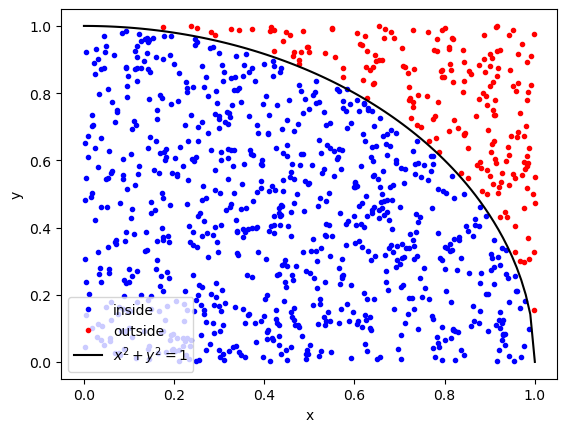

In [16]:
# section 9.5
N = 1000 # number of random values to throw
# throw N x and y random variables uniform in [0,1]
x = np.random.uniform(size = N)
y = np.random.uniform(size = N)
# determine which (x,y) position or inside/outside the unit circle:
rsq = x**2 + y**2
inside = rsq<=1
outside = np.logical_not(inside)
# set aspect ratio to 1 so unit circle looks like a circle. plt.axes().set_aspect(’equal’)
# plot inside as blue dots and outside as red dots
plt.figure()
plt.plot(x[inside],y[inside],"b.",label="inside") 
plt.plot(x[outside],y[outside],"r.",label="outside") # plot the unit circle:
xfin = np.linspace(0,1,100)
yfin = np.sqrt(1-xfin**2)
plt.plot(xfin,yfin,"k-",label="$x^2+y^2=1$") # add labels and legends:
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=3)
plt.show()

In [15]:
# 9.12
# the area with blue points is pi * r^2/4 (1/4 of the area of the sphere)
# the area of the square is  r^2
# the ratio number of inside/ total numer  is proportional to pi (r^2 / 4)  / (r x r) square area
n_inside = np.sum(inside)
pi = n_inside*4./N
print(pi)

3.13484


In [16]:
# 9.13
# This is a binomial distribution with probability success rate of pi/4
# We do know that the sigma for binomial is sqrt(p*(1-p)/N) 
# in our case p = pi/4

sigma = np.sqrt(np.pi *(4-np.pi)/N)
print(sigma)
print(pi-np.pi)

0.005193039777692652
-0.006752653589793045


# 9.6 Montecarlo Integration


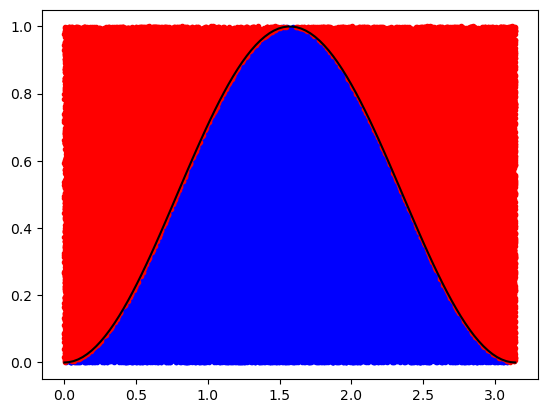

In [17]:
# 9.14
N=100000
theta = np.random.uniform(size = N) * np.pi
y = np.random.uniform(size = N)
inside = y<=np.sin(theta)**2
outside = np.logical_not(inside)
plt.plot(theta[inside],y[inside],"b.",label="inside") 
plt.plot(theta[outside],y[outside],"r.",label="outside") 
xfin = np.linspace(0,1,100)*np.pi
yfin= np.sin(xfin)**2
plt.plot(xfin,yfin,'-k')

In [18]:
A = np.pi * 1
n_inside = np.sum(inside)
integrale = A*n_inside/N
print(integrale)
integ = 1/2.*np.pi - 1/4.* np.sin(2*np.pi)
print(integ)
sigma =  np.pi/(2.*np.sqrt(N)) 
print(sigma)

1.5816348214497813
1.5707963267948966
0.00496729413289805


# Ideal Gas in Two Dimension

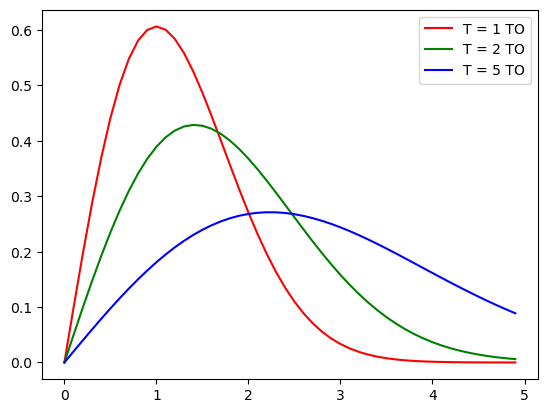

In [19]:
import astropy 
from astropy import constants as c
from astropy import units as u
# 9.15
#
#m = 4.65 * 1e-26 *u.kg
#T = 293 *u.K
#kb = 1.38 * 1e-23 * u.J/u.K
#Pe = np.exp(-E/(kb*T))
#E = 1/2. * m * (vx**2+vy**2)
M0 = 4.65 * 1e-26 * u.kg
T0 = 293 * u.K
V0 = 295 * u.m / u.s

# computational system of units:
M = 1 # mass of gas particles, M0 = 4.65E-26 kg
T = 1#Temperatureofgas,T0=293K 
kb = 1 # Boltzmans constant

def mbspeed(v,T):
    return (M*v / (kb*T))*np.exp(-M*v**2/(2*kb*T))

vspeed = np.arange(0,5,.1)
mbdist = mbspeed(vspeed,T)
plt.plot(vspeed,mbdist,'-r',label="T = 1 TO")

mbdist = mbspeed(vspeed,T*2)
plt.plot(vspeed,mbdist,'-g',label="T = 2 TO")

mbdist = mbspeed(vspeed, T*5)
plt.plot(vspeed,mbdist,'-b',label="T = 5 TO")

plt.legend()

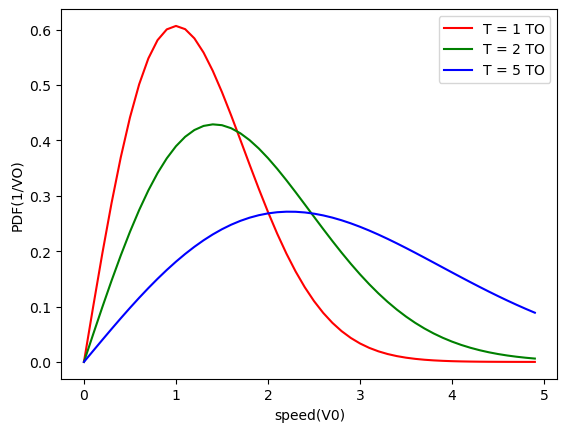

In [20]:
# 9.16
M0 = 1e-15 * u.kg

vspeed = np.arange(0,5,.1)
mbdist = mbspeed(vspeed,T)
plt.plot(vspeed,mbdist,'-r',label="T = 1 TO")

mbdist = mbspeed(vspeed,T*2)
plt.plot(vspeed,mbdist,'-g',label="T = 2 TO")

mbdist = mbspeed(vspeed, T*5)
plt.plot(vspeed,mbdist,'-b',label="T = 5 TO")
plt.ylabel('PDF(1/VO)')
plt.xlabel("speed(V0)")
plt.legend()

In [21]:
#9.17
def collide(ax,ay,bx,by,theta):
    ux = (ax - bx)/2.
    uy = (ay-by)/2.
    dax = (np.cos(theta)-1) * ux - np.sin(theta) * uy
    day = (np.cos(theta)-1) * uy + np.sin(theta) * ux
    ax = ax + dax
    ay = ay + day
    bx = bx - dax
    by = by - day
    return ax, ay, bx, by # updated values

tau = 2*np.pi # Using 2 pi is like saying twice half-way... 
# lab frame is cms, incoming on x axis:
print(np.around(collide(1,0,-1,0,0),2)+0) 
print(np.around(collide(1,0,-1,0,tau/4),2)+0) 
print(np.around(collide(1,0,-1,0,tau/2),2)+0) 
print(np.around(collide(1,0,-1,0,3*tau/4),2)+0)

[ 1.  0. -1.  0.]
[ 0.  1.  0. -1.]
[-1.  0.  1.  0.]
[ 0. -1.  0.  1.]


In [22]:
# lab frame is cms, incoming on y axis:
print(np.around(collide(0,1,0,-1,0),2)+0)
print(np.around(collide(0,1,0,-1,tau/4),2)+0) 
print(np.around(collide(0,1,0,-1,tau/2),2)+0) 
print(np.around(collide(0,1,0,-1,3*tau/4),2)+0)

[ 0.  1.  0. -1.]
[-1.  0.  1.  0.]
[ 0. -1.  0.  1.]
[ 1.  0. -1.  0.]


In [23]:
#9.18
# boost along x axis, incoming on y axis:
print(np.around(collide(1,1,1,-1,0),2)+0)
print(np.around(collide(1,1,1,-1,tau/4),2)+0) 
print(np.around(collide(1,1,1,-1,tau/2),2)+0) 
print(np.around(collide(1,1,1,-1,3*tau/4),2)+0)

[ 1.  1.  1. -1.]
[0. 0. 2. 0.]
[ 1. -1.  1.  1.]
[2. 0. 0. 0.]


In [24]:
#9.19
# test with random values:
print(np.around(collide(6.24, 1.78, 3.35, 5.98, 3.19),2)) 
print(np.around(collide(4.07, 4.69, 1.61, 4.54, 2.46),2)) 
print(np.around(collide(5.28, 2.99, 4.77, 5.22, 3.15),2)) 
print(np.around(collide(2.84, 5.37, 5.47, 6.16, 1.59),2))

[3.25 5.91 6.34 1.85]
[1.84 5.33 3.84 3.9 ]
[4.76 5.22 5.29 2.99]
[4.58 4.46 3.73 7.07]


# 9.11 Initializing the Simulated Ideal Gas

In [35]:
# 9.20
NGAS=1000
XMIN = -2
XMAX = 2 
vx  = np.random.uniform(XMIN, XMAX, NGAS) 
vy  = np.random.uniform(XMIN, XMAX, NGAS)

temperature0 = (np.mean(vx**2) + np.mean(vy**2))/2 
print(temperature0)

#print(vx)
#print(vy)

1.2580535992931476


<ErrorbarContainer object of 3 artists>

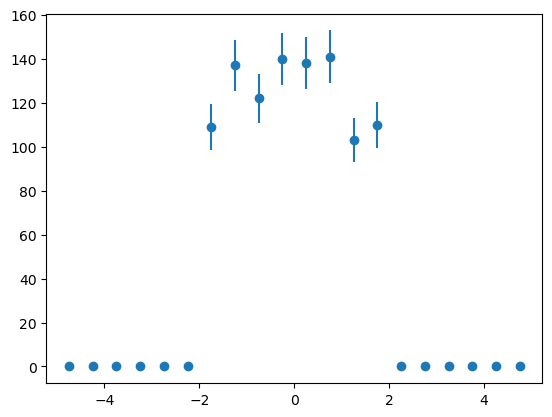

In [36]:
#9.21
hvx,bins = np.histogram(vx,bins=20,range=(-5,5))
cbins = (bins[1:]+bins[:-1])/2
plt.errorbar(cbins,hvx,yerr=np.sqrt(hvx),fmt="o")

<ErrorbarContainer object of 3 artists>

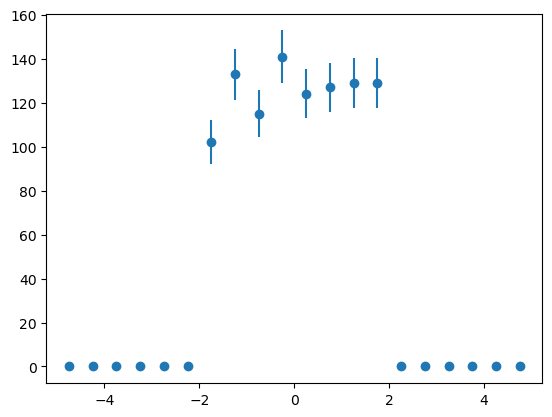

In [37]:
#9.22 
hvy,bins = np.histogram(vy,bins=20,range=(-5,5))
cbins = (bins[1:]+bins[:-1])/2
plt.errorbar(cbins,hvy,yerr=np.sqrt(hvy),fmt="o")

# 9.12 Collisions of an Ideal Gas

In [38]:
vxindex = np.arange(len(vx))
a = np.random.choice(vxindex)
print(a)
print(vx[a])

542
0.523565457799358


In [39]:
#print(a)
#print(vx[0:3])
#b = np.random.choice(vx)
#theta = np.random.uniform(0,2*np.pi)
#print(a)
#print(b)
#print(theta)

In [40]:
for i in range(0,10000):
    vxindex = np.arange(len(vx))
    vyindex = np.arange(len(vy))
    axindex = np.random.choice(vxindex)
    ayindex = np.random.choice(vyindex)
    bxindex = np.random.choice(vxindex)
    byindex = np.random.choice(vyindex)
    theta = np.random.uniform(0,2*np.pi)
    ax, ay, bx, by = collide(vx[axindex],vy[ayindex],vx[bxindex],vy[byindex],theta)
    vx[axindex] = ax 
    vy[ayindex] = ay 
    vx[bxindex] = bx 
    vy[byindex] = by 

array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5])

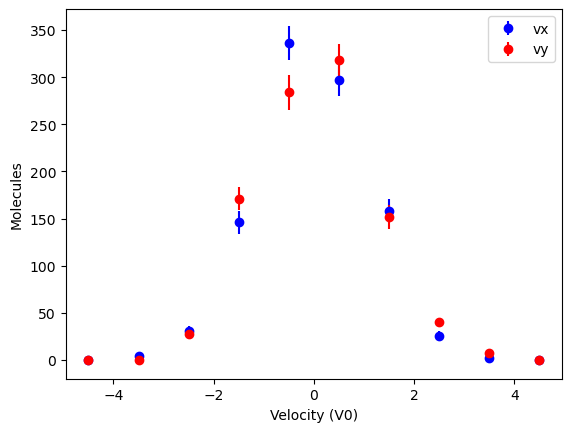

In [41]:
# 9.23
hvx,bins = np.histogram(vx,bins=10,range=(-5,5))
hvy,bins = np.histogram(vy,bins=10,range=(-5,5))
cbins = (bins[1:]+bins[:-1])/2 
plt.errorbar(cbins,hvx,yerr=np.sqrt(hvx),fmt="bo",label="vx") 
plt.errorbar(cbins,hvy,yerr=np.sqrt(hvx),fmt="ro",label="vy")
plt.xlabel("Velocity (V0)") 
plt.ylabel("Molecules") 
plt.legend()
cbins

In [42]:
#9.24 
kT = (np.mean(vx**2) + np.mean(vy**2))/2 
print(temperature1)
print(temperature0)

NameError: name 'temperature1' is not defined

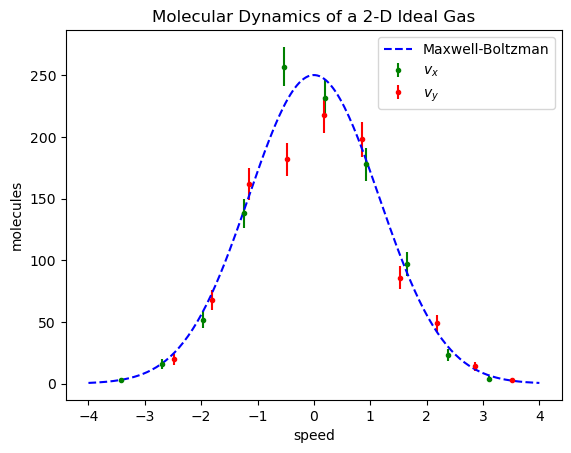

In [43]:
BINS = 10
h_vx,bins_vx = np.histogram(vx,bins=BINS) 
h_vy,bins_vy = np.histogram(vy,bins=BINS) 
h_v,bins_v = np.histogram(np.sqrt(vx**2 + vy**2))

# Get the uncertainties
hvxunc = np.sqrt(h_vx) 
hvyunc = np.sqrt(h_vy) 
hvunc = np.sqrt(h_v)
cbins_vx = 0.5*(bins_vx[1:]+bins_vx[:-1]) 
cbins_vy = 0.5*(bins_vy[1:]+bins_vy[:-1]) 
cbins_v = 0.5*(bins_v[1:]+bins_v[:-1])


kT = 4.0/3.0
vxyMIN = -4 
vxyMAX = 4 
vMIN = 0 
vMAX = 4
vxyf = np.linspace(vxyMIN,vxyMAX,200)
vf = np.linspace(vMIN,vMAX,200)

vxyf = np.linspace(vxyMIN,vxyMAX,200)
vf = np.linspace(vMIN,vMAX,200)

pfxy = NGAS*(cbins_vx[1]-cbins_vx[0])*np.sqrt(M/(2*np.pi*kT))*np.exp((-M*(vxyf**2))/(2*kT)) 
pf2 = NGAS*(cbins_v[1]-cbins_v[0])*((M*vf)/kT)*np.exp((-M*(vf**2))/(2*kT))
plt.errorbar(cbins_vx,h_vx,hvxunc,fmt="g.",label="$v_x$") 
plt.errorbar(cbins_vy,h_vy,hvyunc,fmt="r.",label="$v_y$") 
plt.plot(vxyf,pfxy,"b--",label="Maxwell-Boltzman"); 
plt.legend();
plt.xlabel("speed");
plt.ylabel("molecules");
plt.title("Molecular Dynamics of a 2-D Ideal Gas");

#pfxy = NGAS*(cbins_vx[1]-cbins_vx[0])*
#     np.sqrt(M/(2*np.pi*kT))           * np.exp((-M*(vxyf**2))/(2*kT))
#PDF =   NGAS*\
#     np.sqrt(M/(2*np.pi*temperature1)) * np.exp((-M*(vxyf**2))/(2*temperature1))

#hvx,bins = np.histogram(PDF,bins=20,range=(0,5))      
#cbins = (bins[1:]+bins[:-1])/2 
#plt.errorbar(cbins,hvx,yerr=np.sqrt(hvx),fmt="bo",label="vx") 

<ErrorbarContainer object of 3 artists>

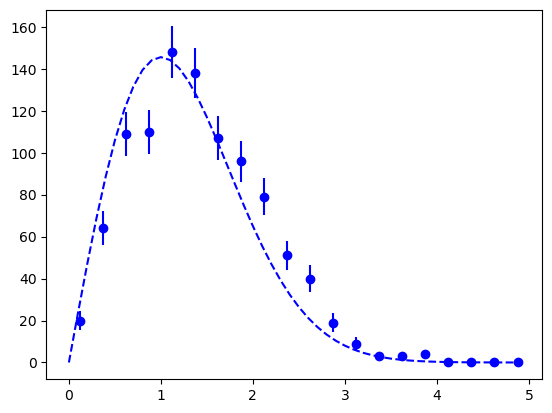

In [55]:
# computational system of units:
M = 1 # mass of gas particles, M0 = 4.65E-26 kg
T = 1#Temperatureofgas,T0=293K 
kb = 1 # Boltzmans constant

def mbspeed(v):
    return (M*v / (kb*T))*np.exp(-M*v**2/(2*kb*T))

v = np.arange(0,5,.1)
mb = mbspeed(v) * 240
plt.plot(v,mb,'--b')

v = np.sqrt(vx**2 + vy**2)
hv ,bins = np.histogram(v ,bins=20 ,range=(0,5))
cbins = (bins[1:]+bins[:-1])/2
plt.errorbar(cbins ,hv ,yerr=np.sqrt(hv),fmt="bo",label="v")
